## **Airbnb Seattle**

QUESTIONS TO ANSWER: 
- When can the city of Seattle expect the highest number of Airbnb occupants?
- Which neighbourhoods will have the most Airbnb renters? 
- When should each neighbourhood expect the most amount of renters? 
    
WHO WILL THIS HELP?:

There are a number of public service entities that this will help serve, but the main ones that I want to focus on are...

- Department of Public Utilities and Waste Management
- Department of Housing and Neighbourhoods
- Public Safety

The fluctuating nature of short-term renting can have a negative impact on the efficient usage of public utilities and public service resources, like gas, water, electricity, and waste management deployment (trash control/garbage pickup). By understanding when and where short-term renters will have the most impact on the local economy, city officials can begin to strategize methods to best deal with the influx. A number of negative externalities of Airbnb have been cited by neighbourhood communities - one of them being the loud and careless nature of some renters. One possible way to combat short-term renters is to host community events and deploy public safety officials when they need it most. 

In [ ]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import calendar as cal

calendar_data = pd.read_csv(r'file_path\calendar.csv', delimiter = ',', header = [0], dtype = {'date': str})
review_data = pd.read_csv(r'file_path\reviews.csv', delimiter = ',', header = [0], dtype = {'date': str})

In [ ]:
calendar_data.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [ ]:
review_data = review_data[['listing_id','id','date']]

In [ ]:
# preprocessing
calendar_data['datetime'] = pd.to_datetime(calendar_data['date'])
calendar_data['date'] = calendar_data['datetime'].dt.date
calendar_data['available'] = calendar_data['available'].replace({'t': True, 'f': False})

review_data['datetime'] = pd.to_datetime(review_data['date'])
review_data['date'] = review_data['datetime'].dt.date
review_data['month'] = review_data['datetime'].dt.month                              
review_data['month'] = review_data['month'].apply(lambda x: cal.month_name[x])
review_data[['listing_id','id']] = review_data[['listing_id','id']].astype(str)

In [ ]:
calendar_data.head()

,listing_id,date,available,price
0,241032,2016-01-04,True,85.0
1,241032,2016-01-05,True,85.0
2,241032,2016-01-06,False,NaN
3,241032,2016-01-07,False,NaN
4,241032,2016-01-08,False,NaN


In [ ]:
calendar_data['listing_id'].nunique()

2873

In [ ]:
# get rid of unnecessary columns
date_availability = calendar_data[['date', 'available']]

# count number of available and unavailable listings by date
listings_available = pd.DataFrame(date_availability[date_availability['available'] == True].groupby('date')['available'].count())
listings_unavailable = pd.DataFrame(date_availability[date_availability['available'] == False].groupby('date')['available'].count())

# rename columns and join the two df's
listings_available.columns = ['listings_available']
listings_unavailable.columns = ['listings_unavailable']
grouped_date = listings_available.join(listings_unavailable, how = 'outer')

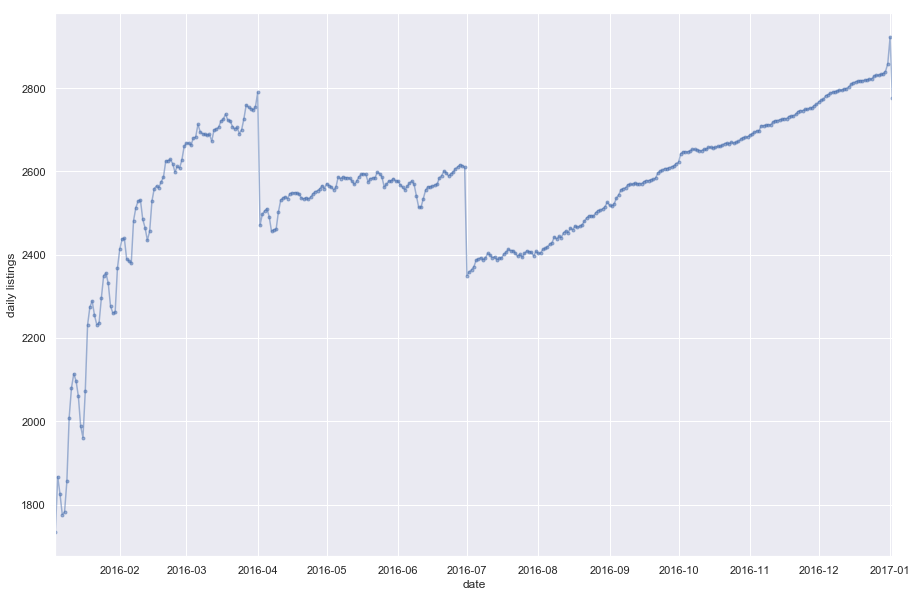

In [ ]:
# set figure size
sns.set(rc={'figure.figsize':(15, 10)})

# plot 
axes = grouped_date['listings_available'].plot(marker = '.', alpha = 0.5)
axes.set_ylabel('daily listings')
plt.savefig('daily_listings.png')

In [ ]:
listings_reviewed = pd.DataFrame(review_data.groupby('date')['id'].count())
listings_reviewed.columns = ['count_reviews']

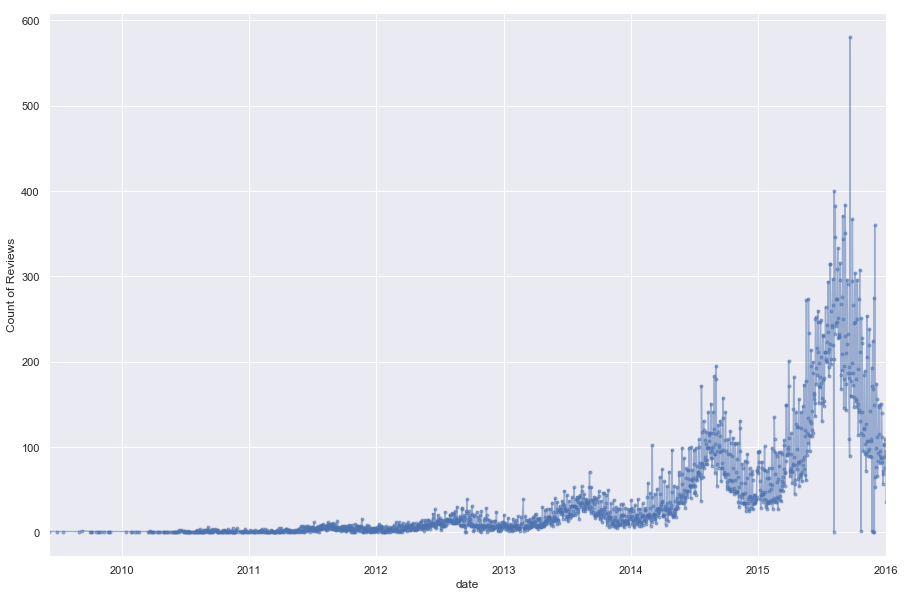

In [ ]:
revs = listings_reviewed['count_reviews'].plot(marker = '.', alpha = 0.5)
revs.set_ylabel('Count of Reviews')
plt.savefig('daily_reviews.png')

## TIME-SERIES OF LISTINGS AVAILABLE

It would be more ideal to have multiple years of data to see the months that have consistently high numbers of listings. However, an it can be estimated from this data when the most renters are likely to be in Seattle. One intereting phenomena is the sharp dip in availability in April and July. A possible explaination would be the population of student hosts/renters during these months where spring break and summer quarter take place. Available listings for each neighborhood group will be used for further analysis.

## Started with one objective and landed on something else...

While this data is still useful for all of the public service entities mentioned above, I want to explore what effect this might have on the student population of Seattle. College student population between just the three colleges I listed is around 56,500 and I assume a percentage of that group lists their long-term rental situation on Airbnb when unoccupied or maybe students turn to Airbnb rentals if the cost of room-and-board is too high. In any case, the student body of Seattle is affected by long-term rentals being unavailable by those who choose Airbnb instead. So how much does this effect rent availability in the neighbourhoods of Seattle?


In [ ]:
# read in listing data
listings_data = pd.read_csv('listings.csv', delimiter = ',', header = [0])
listings_data.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


In [ ]:
# grab only the relevant columns
neighbourhood = listings_data[['id', 'neighbourhood_group_cleansed']]
neighbourhood.columns = ['listing_id', 'hood']
neighbourhood.head(5)

,listing_id,hood
0,241032,Queen Anne
1,953595,Queen Anne
2,3308979,Queen Anne
3,7421966,Queen Anne
4,278830,Queen Anne


In [ ]:
# join the two datasets by unique listing_id
hood_listings = pd.merge(calendar_data, neighbourhood, how = 'left', on = 'listing_id')
hood_listings.head(5)

,listing_id,date,available,price,hood
0,241032,2016-01-04,True,85.0,Queen Anne
1,241032,2016-01-05,True,85.0,Queen Anne
2,241032,2016-01-06,False,NaN,Queen Anne
3,241032,2016-01-07,False,NaN,Queen Anne
4,241032,2016-01-08,False,NaN,Queen Anne


In [ ]:
# create a new dataframe counting up available listings by their neighbourhood
hood_listings_available = pd.DataFrame(hood_listings[hood_listings['available'] == True].groupby(['date', 'hood'])['available'].count())
hood_listings_available = hood_listings_available.reset_index(drop=False)

# reshape the date for easier plotting
hood_listings_available_pivot = hood_listings_available.pivot(index = 'date', columns = 'hood', values = 'available')
hood_listings_available_pivot = hood_listings_available_pivot.stack().reset_index(drop = False)
hood_listings_available_pivot.columns = ['date', 'hood', 'available']

0
date       hood                    
2016-01-04 Ballard              134
           Beacon Hill          118
           Capitol Hill         330
           Cascade               89
           Central Area         369
           Delridge              52
           Downtown             530
           Interbay              11
           Magnolia              44
           Northgate             42
           Other neighborhoods  439
           Queen Anne           200
           Rainier Valley       158
           Seward Park           44
           University District  122
           West Seattle         191
2016-01-05 Ballard              134
           Beacon Hill          118
           Capitol Hill         330
           Cascade               89
           Central Area         369
           Delridge              52
           Downtown             530
           Interbay              11
           Magnolia              44
           Northgate             42
           Other neighborhoods  439
           Queen Anne           200
           Rainier Valley       158
           Seward Park           44
...                             ...
2017-01-01 Capitol Hill         329
           Cascade               89
           Central Area         369
           Delridge              52
           Downtown             530
           Interbay              11
           Magnolia              44
           Northgate             42
           Other neighborhoods  439
           Queen Anne           200
           Rainier Valley       158
           Seward Park           44
           University District  122
           West Seattle         191
2017-01-02 Ballard              134
           Beacon Hill          118
           Capitol Hill         329
           Cascade               89
           Central Area         369
           Delridge              52
           Downtown             530
           Interbay              11
           Magnolia              44
           Northgate             42
           Other neighborhoods  439
           Queen Anne           200
           Rainier Valley       158
           Seward Park           44
           University District  122
           West Seattle         191

[5840 rows x 1 columns]

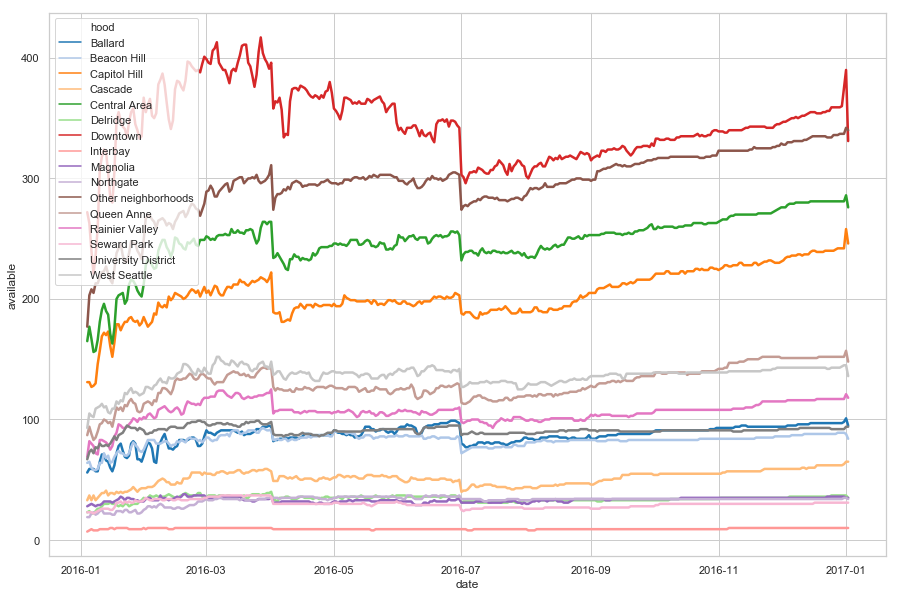

In [ ]:
sns.set(style="whitegrid")
sns.lineplot(x = 'date', y = 'available', hue = 'hood', data = hood_listings_available_pivot, palette="tab20", linewidth=2.5)

## NEIGHBORHOOD ANALYSIS

To further my hypothesis about the sharp dip in availability having to do with college students, I would have liked to see the dips happening around the main college campus areas. There are three main colleges in Seattle - University of Washington, Seattle University, and Seattle Pacific Universiy - located in University District, Capital Hill, and Queen Anne, respectively. Looking at the plots above, the data tells us that pretty much every neighbourhood shows some sort of dip at the beginning of April and July. It might not be unrealistic for college students to live more than a few miles from their university, which completely opens up most of Seattle. It might be a stretch to say students have that much power in the rental economy, but it is something that the city and universities should be concerned about regardless.